# Testing Hash Functions

Avalanche Analysis: A common test of hash function performance is whether or not it achieves “avalanche.”

This refers to the desireable characteristic that
P(Output bit i changes | Input bit j changes) = 0.5 ∀i, j
We are going to analyze three hash functions. Lets fix the range to 10 bits, and P = 1048573 Pick,
a,b,c,d uniformly between [1−1048573], and store them. (you need to report the numbers you generated)

Your hash functions h(x) are
1. ((ax + b) mod P) mod 1024 (2-universal)
2. ((ax2 + bx + c) mod P) mod 1024 (3-universal)
3. ((ax3 + bx2 + cx + d) mod P) mod 1024 (4-universal)
4. murmurhash3 with a fixed seed (use murmurhash from sklearn.utils import murmurhash3_32. Feel
free to take extra mod to constrain it in range [0-1023])

Randomly generate 5000 positive integers 31-bit keys (values of x) to start with. Design your experiment to estimate the probability values (you need to flip bits now).
Create a 2 dimensional heatmap : On x-axis, we have bits in the input. For every input bit j, we have
to calculate 10 values, which is the probability
P(Output bit i changes | Input bit j changes) = 0.5 ∀i, j

Find the most convenient way to have this heatmap. (value of 0.5 should be dark for best visualization).
Write a paragraph on the plot and your conclusion.

Process:
So the way I'm going to go about this is I'll first generate the 5000 positive integers. I'll take an integer(m) convert it to bit representation. I'll flip a bit(one of the 31), thus getting a new number(n). I'll hash both m and n and see the number of bit differences from h(n) and h(m). Repeat this process for each random positive integer generated. Create a heat map and then (I think)write out the P(Output bit i changes | Input bit j changes) ∀i,j that I observe. 



But first I need to create the hash functions:

## Hash Functions

In [1]:
import numpy as np
import random

In [2]:
 from sklearn.utils import murmurhash3_32

In [3]:
P = 1048573 
a = 60843
b = 470521
c = 501441
d = 996768
seed=69420

In [4]:
def h2Uni(x):
    """
    A 2-universal hash function of a positive integer
    
    """
    return (((a * x) + b) % P) % 1024

In [5]:
def h3Uni(x):
    """
    A 3-universal hash function of a positive integer
    
    """
    return (((a * (x ** 2)) + (b * x) + c) % P) % 1024

In [6]:
def h4Uni(x):
    """
    A 4-universal hash function of a positive integer
    
    """
    return (((a * (x ** 3)) + (b * (x ** 2)) + (c *x) + d) % P) % 1024

In [7]:
def hMurmash(x):
    """
    A Murmash hash function of a positive integer
    
    """
    #Do an extra mod 1024
    return (murmurhash3_32(x,seed=seed)) % 1024

In [8]:
#defiing my bit flipping function
def flipKthBit(orig_numb,inputBit):
    '''
    Inputs:
    'orig_numb' is the number whose bit we want to flip
    
    'inputBit' is the particular bit we want to flip. It ranges from 0 to 31
    
    Output:
    A new number as a result of the singular bit flip
    '''
    return (orig_numb ^ (1 << inputBit))

In [9]:
def arrBitDiff(a, b): #I could also use this to figure out the certain bits that are different
    '''
   requires two integers a,b
   
   returns an array showing which bits differed in the two integers
   
   '''

    # since, the numbers are less than 2^31 
    # run the loop from '0' to '31' only
    diff_bit_lst=[]
    count=0
    for i in range(32): 
        # right shift both the numbers by 'i' and 
        # check if the bit at the 0th position is different 
        if ((( a >>  i) & 1) != (( b >>  i) & 1)):  
            diff_bit_lst.append(i)
            count += 1
                        
    return (diff_bit_lst)       

In [10]:
#I need to create a 2dimmensional heat map to show for the 5000 integers, which bits are different when I flip bit j

In [11]:
 #Generating the 5000 random integers
np.random.seed(seed=6) #set the seed
numb5000 = np.random.randint(low=1, high=1048573, size=5000,dtype='int')
numb5000=numb5000.tolist()

In [12]:
#H2Uni
prob_matx=np.zeros((32,10))
for bit in range(32):
    for number in numb5000:
        old_numb = number
        new_numb = flipKthBit(orig_numb=old_numb,inputBit=bit)
        #print(old_numb,new_numb)
        h_new=h2Uni(new_numb)
        h_old=h2Uni(old_numb)
        #print(h_old,h_new)
        bit_pos= arrBitDiff(h_new,h_old)
        #print(bit_pos)
        #TODO find the frequency in which the numbers show up
        for n in bit_pos:
            prob_matx[bit][n]+=1
    
prob_matx = (1/5000)*prob_matx 

#print(prob_matx)
    
    

In [13]:
#heatmap
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
def avalanche_experiment(hash_func,func_name):
    prob_matx=np.zeros((32,10))
    for bit in range(32):
        for number in numb5000:
            old_numb = number
            new_numb = flipKthBit(orig_numb=old_numb,inputBit=bit)
            #print(old_numb,new_numb)
            h_new=hash_func(new_numb)
            h_old=hash_func(old_numb)
            #print(h_old,h_new)
            bit_pos= arrBitDiff(h_new,h_old)
            #print(bit_pos)
            #TODO find the frequency in which the numbers show up
            for n in bit_pos:
                prob_matx[bit][n]+=1

    prob_matx = (1/5000)*prob_matx 
    
    sns.heatmap(prob_matx, cmap=sns.cm.rocket_r)
    plt.title(func_name)
    plt.ylabel("Original bit flipped")
    plt.xlabel("Bit positions post Hash")

    

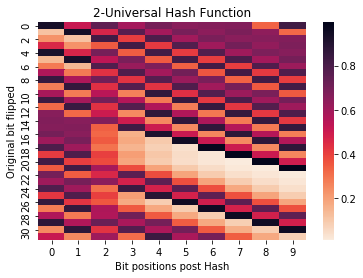

In [15]:
avalanche_experiment(h2Uni,"2-Universal Hash Function")

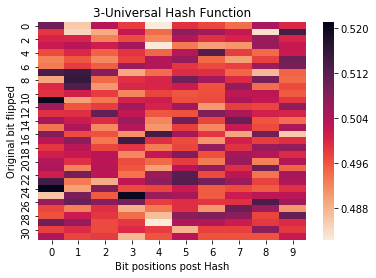

In [16]:
avalanche_experiment(h3Uni,"3-Universal Hash Function")
#hMurmash

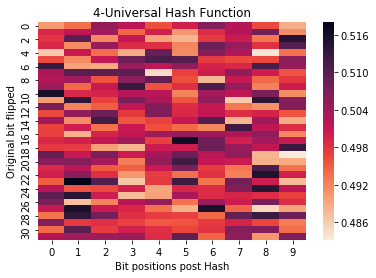

In [17]:
avalanche_experiment(h4Uni,"4-Universal Hash Function")

In [18]:
avalanche_experiment(hMurmash,"Murmash Hash Function")

OverflowError: Python int too large to convert to C long

# Conclusion

Looking at the plots, I saw that as I added more indepedent functions, the probabilty that a jth bit flipped when an ith bit flipped became more uniform. Also for each of the plots, there seems to be a diagonal where he probability is very high, almost 1. Therefore, I think its safe to conclude that the more independent the hash functions are, the more likely that it will achieve 'avalanche' and achieve it more consistently. 